In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | merauke
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | staroaleyskoye
Processing Record 4 of Set 1 | luderitz
Processing Record 5 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 1 | ulaangom
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | pangody
Processing Record 9 of Set 1 | tubruq
City not found. Skipping...
Processing Record 10 of Set 1 | amapa
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | nanton
Processing Record 15 of Set 1 | biak
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | porto velho
Processing Record 20 of Set 1 | okha
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | baruun-ur

Processing Record 38 of Set 4 | provideniya
Processing Record 39 of Set 4 | antsohihy
Processing Record 40 of Set 4 | hilo
Processing Record 41 of Set 4 | banepa
Processing Record 42 of Set 4 | georgetown
Processing Record 43 of Set 4 | sapozhok
Processing Record 44 of Set 4 | bitburg
Processing Record 45 of Set 4 | north bend
Processing Record 46 of Set 4 | concepcion
Processing Record 47 of Set 4 | rawson
Processing Record 48 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 49 of Set 4 | ngukurr
City not found. Skipping...
Processing Record 50 of Set 4 | kruisfontein
Processing Record 1 of Set 5 | nuuk
Processing Record 2 of Set 5 | mbanza-ngungu
Processing Record 3 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 4 of Set 5 | bom jesus
Processing Record 5 of Set 5 | asau
Processing Record 6 of Set 5 | cherskiy
Processing Record 7 of Set 5 | channel-port aux basques
Processing Record 8 of Set 5 | codrington
Processing Record 9 of Set 5 | chihu

Processing Record 24 of Set 8 | chernolesskoye
Processing Record 25 of Set 8 | ancud
Processing Record 26 of Set 8 | half moon bay
Processing Record 27 of Set 8 | novoukrayinka
Processing Record 28 of Set 8 | pacific grove
Processing Record 29 of Set 8 | bushehr
Processing Record 30 of Set 8 | hasilpur
Processing Record 31 of Set 8 | koygorodok
Processing Record 32 of Set 8 | sena madureira
Processing Record 33 of Set 8 | beyneu
Processing Record 34 of Set 8 | mayuge
Processing Record 35 of Set 8 | marcona
City not found. Skipping...
Processing Record 36 of Set 8 | agustin codazzi
Processing Record 37 of Set 8 | esqueda
Processing Record 38 of Set 8 | wasilla
Processing Record 39 of Set 8 | edgewater
Processing Record 40 of Set 8 | lang son
Processing Record 41 of Set 8 | saint george
Processing Record 42 of Set 8 | predivinsk
Processing Record 43 of Set 8 | mwense
Processing Record 44 of Set 8 | chirongui
Processing Record 45 of Set 8 | mantua
Processing Record 46 of Set 8 | solnechny

Processing Record 11 of Set 12 | cockburn town
Processing Record 12 of Set 12 | blagoyevo
Processing Record 13 of Set 12 | patan
Processing Record 14 of Set 12 | soe
Processing Record 15 of Set 12 | myitkyina
Processing Record 16 of Set 12 | sungaipenuh
Processing Record 17 of Set 12 | gat
Processing Record 18 of Set 12 | bagado
Processing Record 19 of Set 12 | letnyaya stavka
Processing Record 20 of Set 12 | duiwelskloof
Processing Record 21 of Set 12 | orimattila
Processing Record 22 of Set 12 | batemans bay
Processing Record 23 of Set 12 | fairbanks
Processing Record 24 of Set 12 | mareeba
Processing Record 25 of Set 12 | kirakira
Processing Record 26 of Set 12 | thinadhoo
Processing Record 27 of Set 12 | bahia blanca
Processing Record 28 of Set 12 | kunyang
Processing Record 29 of Set 12 | balabac
Processing Record 30 of Set 12 | griffith
Processing Record 31 of Set 12 | port keats
Processing Record 32 of Set 12 | kumluca
Processing Record 33 of Set 12 | zheleznodorozhnyy
Processin

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Merauke,-8.4667,140.3333,75.74,87,89,14.54,ID,2021-08-09 21:07:06
1,Hermanus,-34.4187,19.2345,49.89,71,3,4.14,ZA,2021-08-09 21:07:07
2,Staroaleyskoye,51.0061,82.0000,58.86,95,100,6.71,RU,2021-08-09 21:07:07
3,Luderitz,-26.6481,15.1594,61.29,49,0,18.79,NA,2021-08-09 21:07:07
4,Ulaangom,49.9811,92.0667,60.01,76,7,0.34,MN,2021-08-09 21:07:08
5,Albany,42.6001,-73.9662,86.63,60,51,7.47,US,2021-08-09 21:06:42
6,Pangody,65.8500,74.4859,49.50,80,100,11.88,RU,2021-08-09 21:07:08
7,Amapa,1.0000,-52.0000,79.43,71,69,3.00,BR,2021-08-09 21:07:09
8,Mataura,-46.1927,168.8643,43.48,93,87,5.53,NZ,2021-08-09 21:07:09
9,Bredasdorp,-34.5322,20.0403,44.83,79,1,3.87,ZA,2021-08-09 21:07:09


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Merauke,ID,2021-08-09 21:07:06,-8.4667,140.3333,75.74,87,89,14.54
1,Hermanus,ZA,2021-08-09 21:07:07,-34.4187,19.2345,49.89,71,3,4.14
2,Staroaleyskoye,RU,2021-08-09 21:07:07,51.0061,82.0000,58.86,95,100,6.71
3,Luderitz,NA,2021-08-09 21:07:07,-26.6481,15.1594,61.29,49,0,18.79
4,Ulaangom,MN,2021-08-09 21:07:08,49.9811,92.0667,60.01,76,7,0.34


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

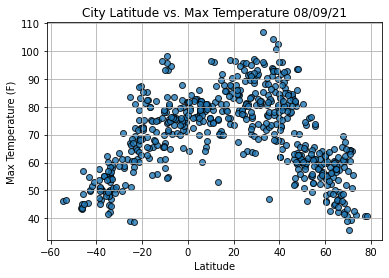

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

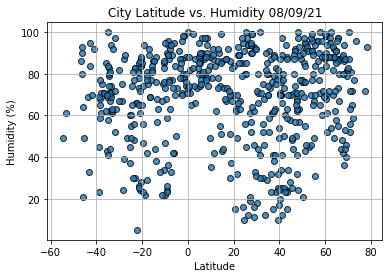

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

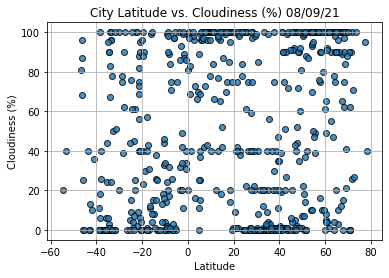

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

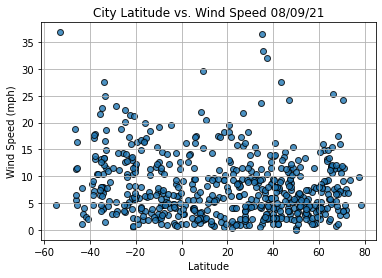

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
index13 = city_data_df.loc[13]
index13

City                    Ilulissat
Country                        GL
Date          2021-08-09 21:07:11
Lat                       69.2167
Lng                         -51.1
Max Temp                    51.82
Humidity                       40
Cloudiness                     21
Wind Speed                   11.5
Name: 13, dtype: object

In [18]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4       True
       ...  
577    False
578     True
579     True
580     True
581    False
Name: Lat, Length: 582, dtype: bool

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Staroaleyskoye,RU,2021-08-09 21:07:07,51.0061,82.0000,58.86,95,100,6.71
4,Ulaangom,MN,2021-08-09 21:07:08,49.9811,92.0667,60.01,76,7,0.34
5,Albany,US,2021-08-09 21:06:42,42.6001,-73.9662,86.63,60,51,7.47
6,Pangody,RU,2021-08-09 21:07:08,65.8500,74.4859,49.50,80,100,11.88
7,Amapa,BR,2021-08-09 21:07:09,1.0000,-52.0000,79.43,71,69,3.00


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

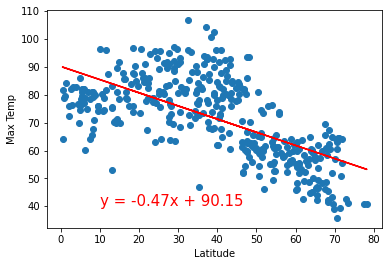

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

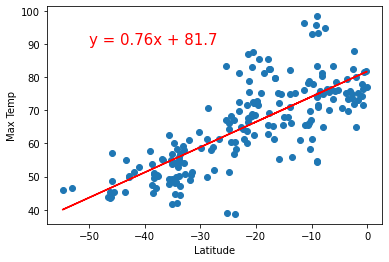

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

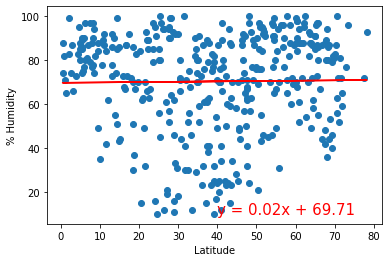

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

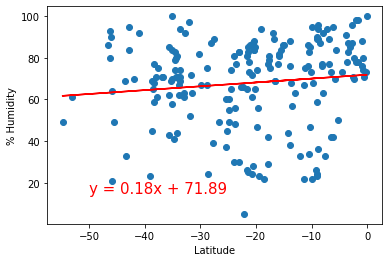

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

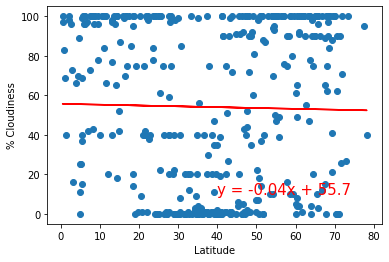

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

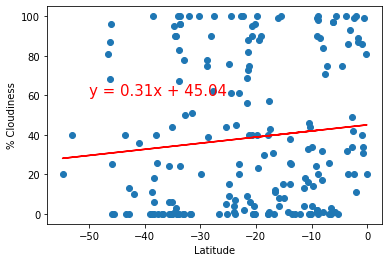

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

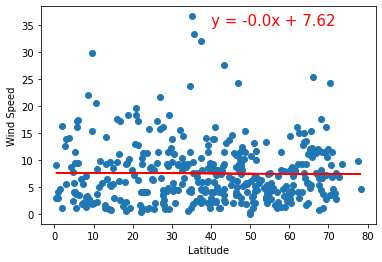

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

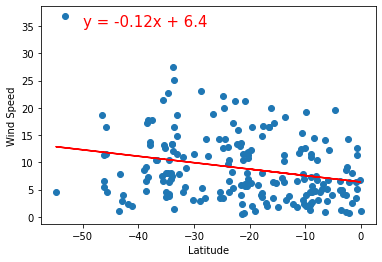

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))